#**Village-wise Survey Data of ASSAM for Mission Antyodaya 2020**

**Objective of Mission Antyodaya:** To survey and collect villages' infrastructure and services data across the country aimed at uplifting underserved communities by assessing and improving infrastructure and services in rural areas.

**Focus Ares:**  26672 villages in ASSAM

**Methodology**: Our approach involves four key stages:


1.   Data identification
2.   Data preprocessing
3.   Data visualization
4.   Data analysis


Each stage plays a crucial role in unraveling valuable insights from the dataset.

In [ ]:
#For Working with data sets
import pandas as pd


import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

#1. Data identification#

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
#Path to the dataset
path = '/content/drive/MyDrive/DAV/Project/MA2020_ASSAM.csv'

In [ ]:
#Reading data as csv
initial_data = pd.read_csv(path)

In [ ]:
#Dimensions of Dataset
rows,columns = initial_data.shape


print("inital number of rows", rows)
print("initial number of columns", columns)

inital number of rows 26673
initial number of columns 160


##Data ##

  - Number of total population
  - Number of male population
  - Number of female population
  - Number of total households
  
- Household Activities:
  - Number of households engaged mainly in farm activities
  - Number of households engaged mainly in non-farm activities


- Housing and Infrastructure:
  - Number of households with kuccha walls and roofs
  - Number of households benefiting from housing schemes
  - Availability of piped tap water
  - Connectivity to all-weather roads
  - Presence of internal pucca roads (CC/brick roads)

- Electricity and Energy Sources:
  - Availability of electricity for domestic use
  - Beneficiaries under the Saubhagya scheme
  - Use of solar energy/wind energy for electrification
  - Number of households electrified by solar energy/wind energy

- Public Distribution System (PDS):
  - Availability of the public distribution system
  - Number of households holding BPL ration cards

- Educational Facilities:
  - Availability of primary, middle, high, and higher/senior secondary schools.


In [ ]:
initial_data

,STATE NAME,STATE CODE,DISTRICT NAME,DISTRICT CODE,SUB DISTRICT NAME,SUB DISTRICT CODE,BLOCK NAME,BLOCK CODE,GP NAME,GP CODE,...,NUMBER OF FARMERS RECEIVED THE SOIL TESTING REPORT,TOTAL NUMBER OF ELECTED REPRESENTATIVES,NUMBER OF ELECTED REPRESENTATIVES ORIENTED UNDER RASHTRIYA GRAM SWARAJ ABHIYAN,NUMBER OF ELECTED REPRESENTATIVES UNDERGONE REFRESHER TRAINING UNDER RASHTRIYA GRAM SWARAJ ABHIYAN,TOTAL APPROVED LABOUR BUDGET FOR THE YEAR 2018-19,TOTAL EXPENDITURE APPROVED UNDER NRM IN THE LABOUR BUDGET FOR THE YEAR 2018-19),"TOTAL AREA COVERED UNDER IRRIGATION (DRIP, SPRINKLER), IF IN ACRES DIVIDE BY 2.47",NUMBER OF HOUSEHOLDS HAVING PIPED WATER CONNECTION,VILLAGE LATITUDE,VILLAGE LONGITUDE
0,ASSAM,18,KOKRAJHAR,294,Bagribari (Pt),2005,Debitola-BTC,6595,Tipkai,253630,...,6,8,6,4,0.0,0.0,0.00,0,26.090090,89.979380
1,ASSAM,18,BAKSA,616,Tamulpur,2144,NAGRIJULI,2683,NIZ DEFELI,253490,...,0,0,0,0,0.0,0.0,0.00,0,26.594595,91.641990
2,ASSAM,18,DHEMAJI,284,Jonai,2057,MURKONGSELEK,2548,GALISIKARI,106074,...,0,1,0,0,0.0,0.0,0.00,0,27.747747,95.118210
3,ASSAM,18,SIVASAGAR,300,Amguri,2072,GAURISAGAR,2695,BARUAPUKHURI,107445,...,0,10,10,10,0.0,0.0,0.00,0,26.954954,94.561104
4,ASSAM,18,CHIRANG,612,Sidli (Pt),2114,SIDLI-CHIRANG,2505,SANTIPUR,253485,...,0,0,0,0,0.0,0.0,0.00,0,26.702703,90.498500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26668,ASSAM,18,KARIMGANJ,293,Patharkandi,2104,LOWAIRPOA,2629,JHERJHERI,106880,...,0,1,0,0,0.0,0.0,0.00,0,26.162163,91.741260
26669,ASSAM,18,KARIMGANJ,293,Patharkandi,2104,LOWAIRPOA,2629,JHERJHERI,106880,...,0,1,0,0,0.0,0.0,0.00,0,26.162163,91.741260
26670,ASSAM,18,KARIMGANJ,293,Karimganj,2101,PATHARKANDI,2631,BANDARKUNA,106898,...,0,0,0,0,0.0,0.0,0.00,0,24.870348,92.355300
26671,ASSAM,18,KARIMGANJ,293,Nilambazar,2103,PATHARKANDI,2631,BANDARKUNA,106898,...,0,0,0,0,0.0,0.0,0.00,0,24.870724,92.354990


#2. Data Preprocessing#


###Removing the NA values###

In [ ]:
#Calculate the number of NaN values in each column
x = initial_data.isna().sum(axis = 0)


In [ ]:
#Columns which has NA values
na_columns = x[x != 0]

print(na_columns)


AC CODE                                                                                                                                                  2445
OTHER ASSEMBLY CONSTITUENCIES                                                                                                                           19247
DOES THE VILLAGE HAS ANY FARMERS COLLECTIVE                                                                                                             24634
AVAILABILITY OF ELECTRICITY FOR DOMESTIC USE                                                                                                             2598
NUMBER OF HOUSEHOLDS ELECTRIFIED BY SOLAR ENERGY/WIND ENERGY                                                                                            23332
AVAILABILITY OF RECREATIONAL CENTRE/SPORTS PLAYGROUND ETC                                                                                               19545
AVAILABILITY OF TELEPHONE SERVICES                  

In [ ]:
#Remove the colums with NA entries
cleaned_data = initial_data.drop(columns = na_columns.index)

In [ ]:
cleaned_data.shape

(26673, 150)

###Removing the duplicate village *entries*###

In [ ]:
# Duplicate village codes
duplicate_village_codes = cleaned_data[cleaned_data.duplicated(subset=['VILLAGE CODE'])]

# Duplicate rows with village codes
print(duplicate_village_codes[['VILLAGE CODE', 'VILLAGE NAME']])



       VILLAGE CODE                    VILLAGE NAME
1955         290759              Nam Hollong Nagaon
2012         301151   Apin Grant (Lata Kandi Grant)
2038         290783                      Chikarajan
2039         290784                    Hollong Guri
2647         287145                       Hantapara
2941         286996                        Hatimara
2981         287139                          Joypur
5496         283087                        Bheraldi
6387         303395              Numalijalah (Part)
6412         299469      Latigram Grant (Lathigram)
7474         301165                   Rongpur Pt IV
8728         286762                 No.2 Bihpukhuri
8733         286723                      Tipu Basti
9149         301008                Kanchanpur Grant
9278         301205                         Sultani
9331         299293                  Borakhai Grant
9822         301216              Janira Bagan Bosti
10206        299470  Istampur Grant (Estampurgrant)
11378       

In [ ]:
# Remove duplicate village entries
cleaned_data.drop_duplicates(subset=['VILLAGE CODE'], inplace=True)

# Display the cleaned DataFrame
cleaned_data

,STATE NAME,STATE CODE,DISTRICT NAME,DISTRICT CODE,SUB DISTRICT NAME,SUB DISTRICT CODE,BLOCK NAME,BLOCK CODE,GP NAME,GP CODE,...,NUMBER OF FARMERS RECEIVED THE SOIL TESTING REPORT,TOTAL NUMBER OF ELECTED REPRESENTATIVES,NUMBER OF ELECTED REPRESENTATIVES ORIENTED UNDER RASHTRIYA GRAM SWARAJ ABHIYAN,NUMBER OF ELECTED REPRESENTATIVES UNDERGONE REFRESHER TRAINING UNDER RASHTRIYA GRAM SWARAJ ABHIYAN,TOTAL APPROVED LABOUR BUDGET FOR THE YEAR 2018-19,TOTAL EXPENDITURE APPROVED UNDER NRM IN THE LABOUR BUDGET FOR THE YEAR 2018-19),"TOTAL AREA COVERED UNDER IRRIGATION (DRIP, SPRINKLER), IF IN ACRES DIVIDE BY 2.47",NUMBER OF HOUSEHOLDS HAVING PIPED WATER CONNECTION,VILLAGE LATITUDE,VILLAGE LONGITUDE
0,ASSAM,18,KOKRAJHAR,294,Bagribari (Pt),2005,Debitola-BTC,6595,Tipkai,253630,...,6,8,6,4,0.0,0.0,0.00,0,26.090090,89.979380
1,ASSAM,18,BAKSA,616,Tamulpur,2144,NAGRIJULI,2683,NIZ DEFELI,253490,...,0,0,0,0,0.0,0.0,0.00,0,26.594595,91.641990
2,ASSAM,18,DHEMAJI,284,Jonai,2057,MURKONGSELEK,2548,GALISIKARI,106074,...,0,1,0,0,0.0,0.0,0.00,0,27.747747,95.118210
3,ASSAM,18,SIVASAGAR,300,Amguri,2072,GAURISAGAR,2695,BARUAPUKHURI,107445,...,0,10,10,10,0.0,0.0,0.00,0,26.954954,94.561104
4,ASSAM,18,CHIRANG,612,Sidli (Pt),2114,SIDLI-CHIRANG,2505,SANTIPUR,253485,...,0,0,0,0,0.0,0.0,0.00,0,26.702703,90.498500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26668,ASSAM,18,KARIMGANJ,293,Patharkandi,2104,LOWAIRPOA,2629,JHERJHERI,106880,...,0,1,0,0,0.0,0.0,0.00,0,26.162163,91.741260
26669,ASSAM,18,KARIMGANJ,293,Patharkandi,2104,LOWAIRPOA,2629,JHERJHERI,106880,...,0,1,0,0,0.0,0.0,0.00,0,26.162163,91.741260
26670,ASSAM,18,KARIMGANJ,293,Karimganj,2101,PATHARKANDI,2631,BANDARKUNA,106898,...,0,0,0,0,0.0,0.0,0.00,0,24.870348,92.355300
26671,ASSAM,18,KARIMGANJ,293,Nilambazar,2103,PATHARKANDI,2631,BANDARKUNA,106898,...,0,0,0,0,0.0,0.0,0.00,0,24.870724,92.354990


#Data Visulization#

##Plotting the population of each district##
###Bar Plot###

In [ ]:
# Group data by district and sum the population
district_population = cleaned_data.groupby('DISTRICT NAME')['NUMBER OF TOTAL POPULATION'].sum().reset_index()

district_population


,DISTRICT NAME,NUMBER OF TOTAL POPULATION
0,BAKSA,1111560
1,BARPETA,2129474
2,BONGAIGAON,785991
3,Biswanath,990567
4,CACHAR,1900228
5,CHARAIDEO,547646
6,CHIRANG,532831
7,DARRANG,1054366
8,DHEMAJI,1094430
9,DHUBRI,2031614


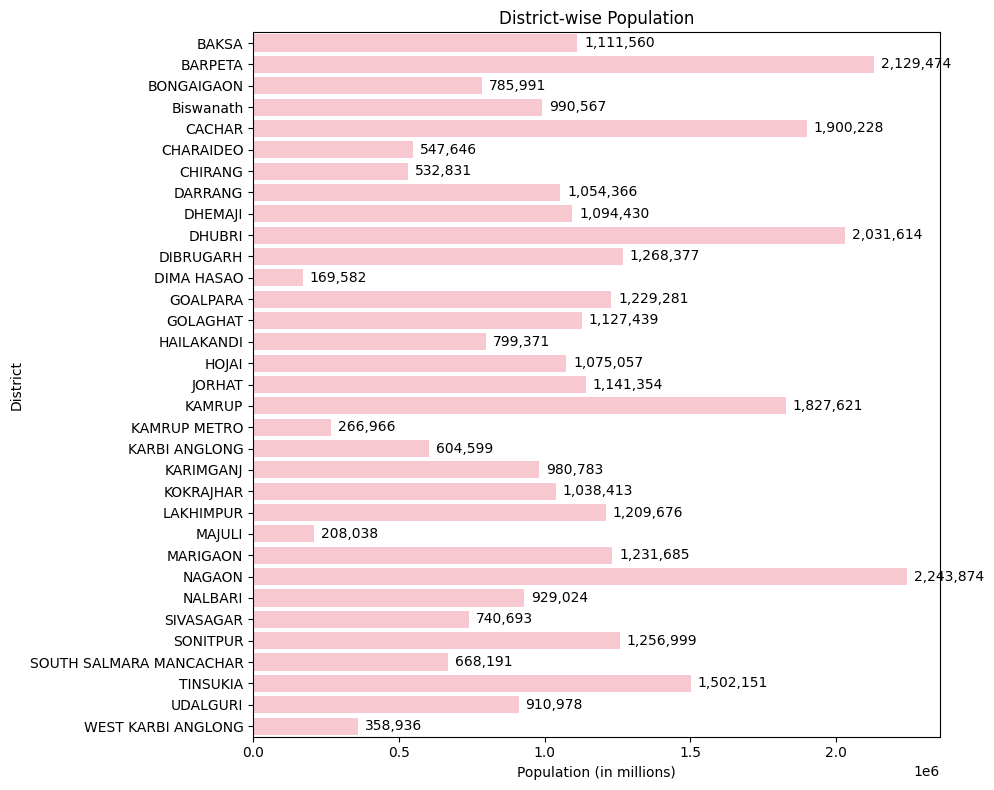

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='NUMBER OF TOTAL POPULATION', y='DISTRICT NAME', data=district_population, color='pink')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}',
                (p.get_width(), p.get_y() + p.get_height()/2 ),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.title('District-wise Population')
plt.xlabel('Population (in millions)')
plt.ylabel('District')

plt.tight_layout()
plt.show()

##Plotting the population of each district Gender wise##
###Bar Plot###

In [ ]:

# Group by district name and sum the number of males and females
district_gender_pop = cleaned_data.groupby('DISTRICT NAME')[['NUMBER OF MALE', 'NUMBER OF FEMALE']].sum().reset_index()
print(district_gender_pop)





              DISTRICT NAME  NUMBER OF MALE  NUMBER OF FEMALE
0                     BAKSA          568553            534822
1                   BARPETA         1060193            973633
2                BONGAIGAON          377254            354178
3                 Biswanath          497241            453428
4                    CACHAR          966299            900255
5                 CHARAIDEO          232100            216289
6                   CHIRANG          268135            257062
7                   DARRANG          517189            492858
8                   DHEMAJI          479069            449212
9                    DHUBRI          945337            847758
10                DIBRUGARH          625846            609240
11               DIMA HASAO           85009             83764
12                 GOALPARA          611981            573516
13                 GOLAGHAT          572214            551488
14               HAILAKANDI          386798            353502
15      

In [ ]:
# Melt the dataframe to plot males and females separately
district_gender_pop_melted = district_gender_pop.melt(id_vars='DISTRICT NAME', var_name='GENDER', value_name='POPULATION')
print(district_gender_pop_melted)

              DISTRICT NAME            GENDER  POPULATION
0                     BAKSA    NUMBER OF MALE      568553
1                   BARPETA    NUMBER OF MALE     1060193
2                BONGAIGAON    NUMBER OF MALE      377254
3                 Biswanath    NUMBER OF MALE      497241
4                    CACHAR    NUMBER OF MALE      966299
..                      ...               ...         ...
61                 SONITPUR  NUMBER OF FEMALE      585305
62  SOUTH SALMARA MANCACHAR  NUMBER OF FEMALE      314404
63                 TINSUKIA  NUMBER OF FEMALE      694051
64                 UDALGURI  NUMBER OF FEMALE      430331
65       WEST KARBI ANGLONG  NUMBER OF FEMALE      162912

[66 rows x 3 columns]


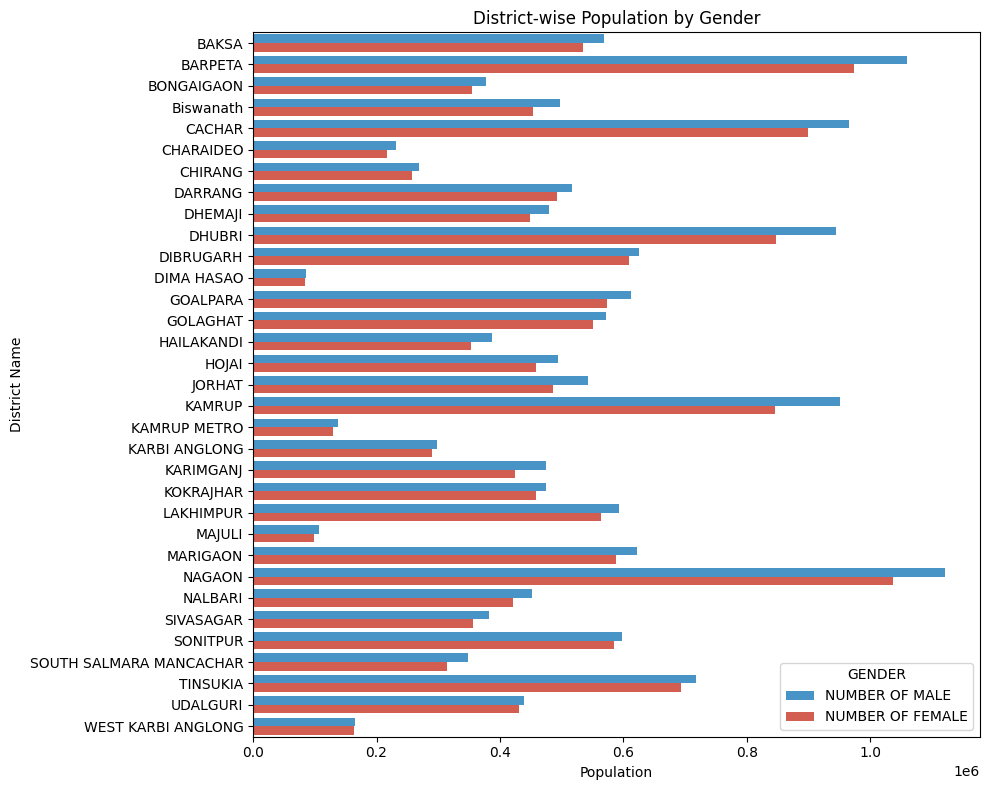

In [ ]:

# Define custom colors for male and female
custom_palette = {'NUMBER OF MALE': '#3498db', 'NUMBER OF FEMALE': '#e74c3c'}

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='POPULATION', y='DISTRICT NAME', hue='GENDER', data=district_gender_pop_melted, palette=custom_palette)

plt.title('District-wise Population by Gender')
plt.xlabel('Population')
plt.ylabel('District Name')

plt.tight_layout()
plt.show()

##Plotting the number of household and how many are engaged majorly in farm activities##


Stacked bar plot

In [ ]:
# Grouping the data by district name and summing the values for 'NUMBER OF TOTAL HOUSEHOLD' and 'NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN FARM ACTIVITIES'
district_activities = cleaned_data.groupby('DISTRICT NAME')[['NUMBER OF TOTAL HOUSEHOLD', 'NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN FARM ACTIVITIES']].sum().reset_index()

# Displaying the new DataFrame
district_activities

,DISTRICT NAME,NUMBER OF TOTAL HOUSEHOLD,NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN FARM ACTIVITIES
0,BAKSA,230954,137196
1,BARPETA,421412,217139
2,BONGAIGAON,149216,83565
3,Biswanath,182388,75903
4,CACHAR,387198,114785
5,CHARAIDEO,105996,57550
6,CHIRANG,116555,45690
7,DARRANG,210496,132089
8,DHEMAJI,191780,134087
9,DHUBRI,371849,190732


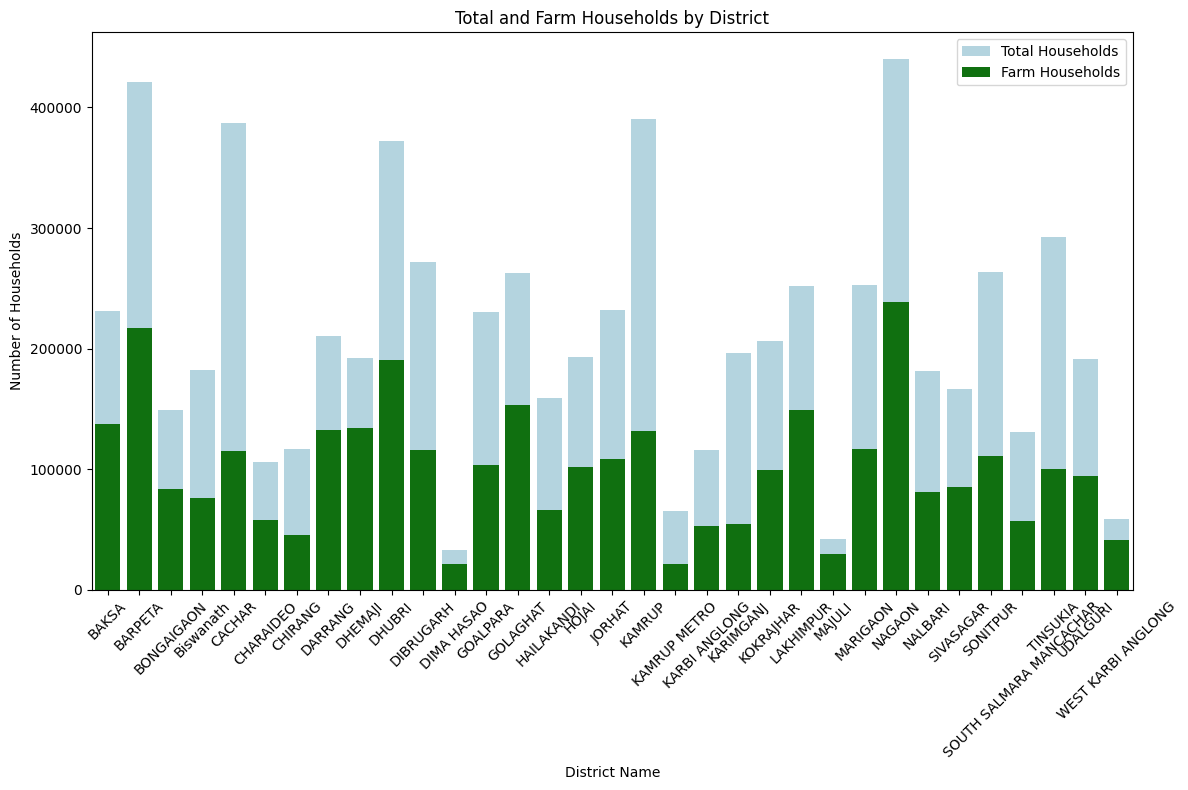

In [ ]:

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='DISTRICT NAME', y='NUMBER OF TOTAL HOUSEHOLD', data=district_activities, color='lightblue', label='Total Households')
sns.barplot(x='DISTRICT NAME', y='NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN FARM ACTIVITIES', data=district_activities, color='green', label='Farm Households')

# Adding labels and title
plt.title('Total and Farm Households by District')
plt.xlabel('District Name')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# **Scatter Plot & Violin Plot**

In [ ]:
# Filter the data to include only the relevant columns
pmay_data = cleaned_data[['DISTRICT NAME', 'NUMBER OF HOUSEHOLDS WHO HAVE GOT A PMAY HOUSE (COMPLETED OR SANCTIONED)']]

# Group the data by district and sum the values for each district
district_data_sum = pmay_data.groupby('DISTRICT NAME').sum().reset_index()


In [ ]:
# Specify the districts for which you want to plot
districts_to_plot = ['BAKSA', 'DHUBRI', 'MAJULI']



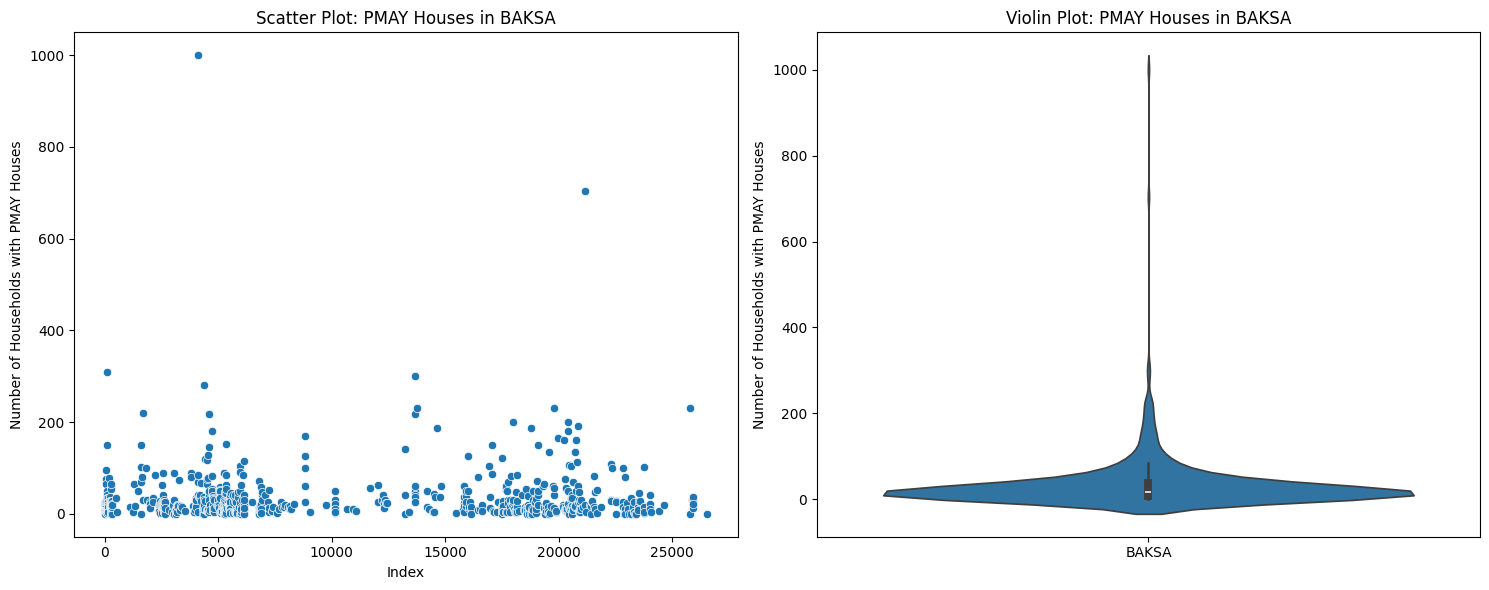

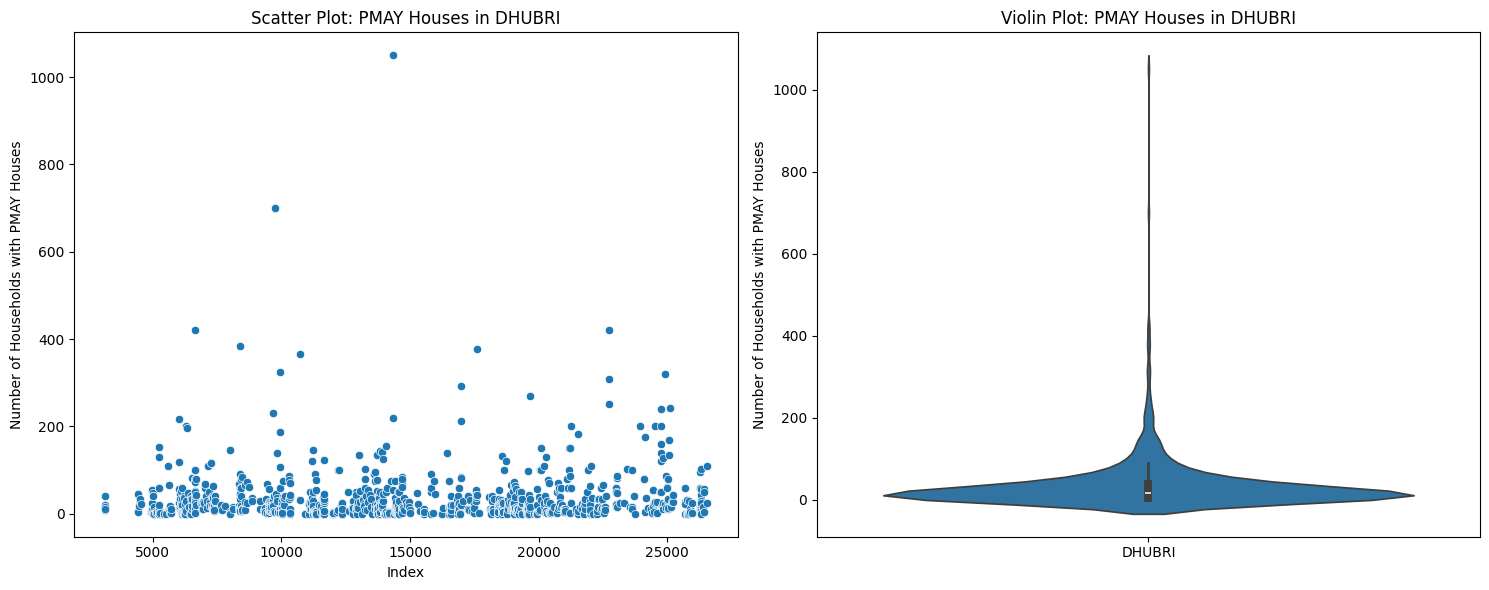

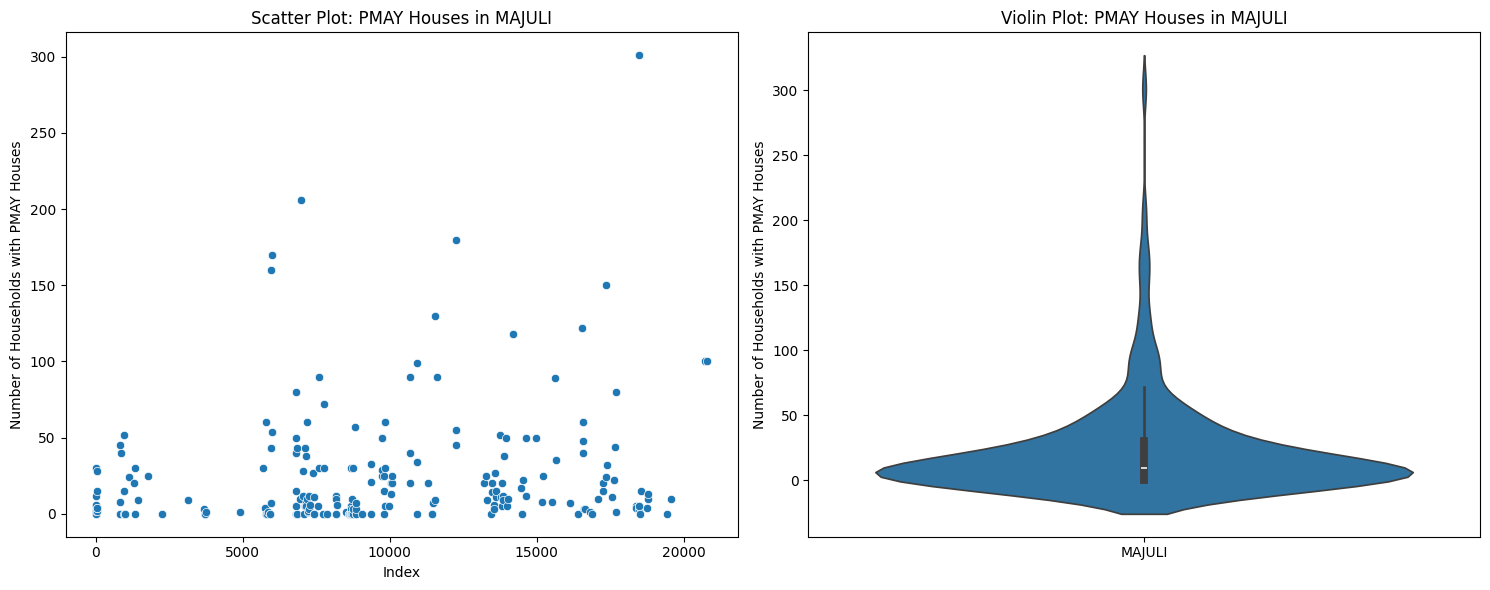

In [ ]:

# Filter the data to include only the specified districts
pmay_data_filtered = pmay_data[pmay_data['DISTRICT NAME'].isin(districts_to_plot)]

# Plot scatter plot and violin plot side by side for each specified district
for district in districts_to_plot:
    # Extract the filtered data for the current district
    district_data = pmay_data_filtered[pmay_data_filtered['DISTRICT NAME'] == district]

    # Create a new figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot scatter plot
    sns.scatterplot(ax=axes[0], x=district_data.index, y='NUMBER OF HOUSEHOLDS WHO HAVE GOT A PMAY HOUSE (COMPLETED OR SANCTIONED)', data=district_data)
    axes[0].set_title(f'Scatter Plot: PMAY Houses in {district}')
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel('Number of Households with PMAY Houses')

    # Plot violin plot
    sns.violinplot(ax=axes[1],x='DISTRICT NAME', y='NUMBER OF HOUSEHOLDS WHO HAVE GOT A PMAY HOUSE (COMPLETED OR SANCTIONED)', data=district_data)
    axes[1].set_title(f'Violin Plot: PMAY Houses in {district}')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Number of Households with PMAY Houses')

    plt.tight_layout()
    plt.show()

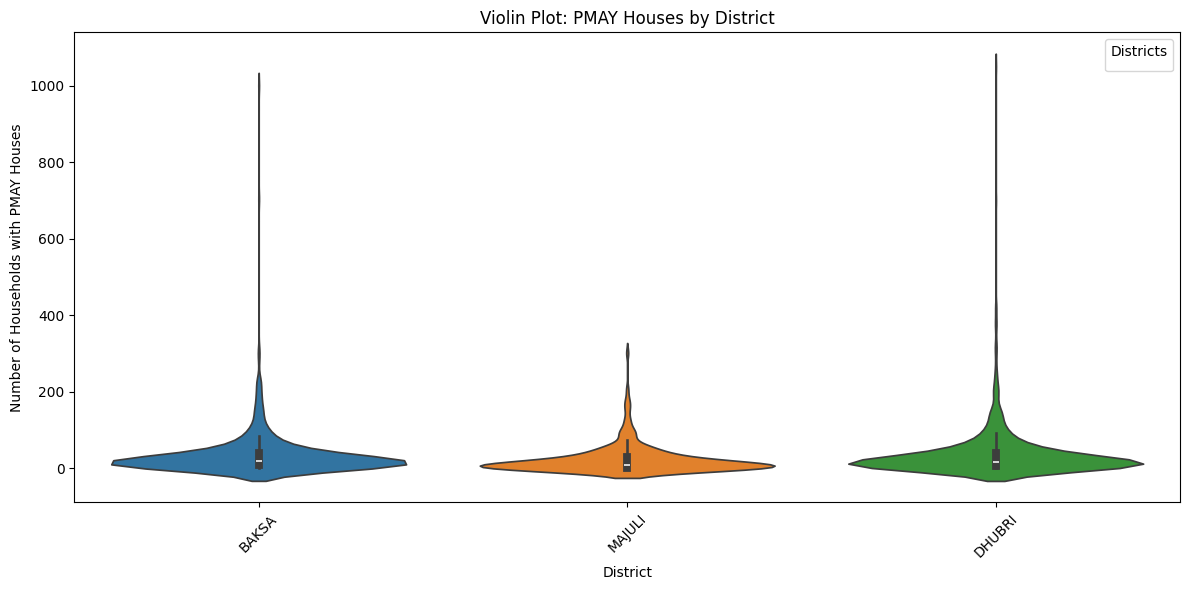

In [ ]:

# Create a new figure
plt.figure(figsize=(12, 6))

# Plot violin plot for all specified districts
sns.violinplot(x='DISTRICT NAME', y='NUMBER OF HOUSEHOLDS WHO HAVE GOT A PMAY HOUSE (COMPLETED OR SANCTIONED)', data=pmay_data_filtered, hue='DISTRICT NAME')
plt.title('Violin Plot: PMAY Houses by District')
plt.xlabel('District')
plt.ylabel('Number of Households with PMAY Houses')
plt.xticks(rotation=45)
plt.legend(title='Districts')

plt.tight_layout()
plt.show()

#Plotting the Housing Status of Assam#
##Using Pie chart##

In [ ]:

# Add the data for the entire state
total_kuccha_wall_roof = cleaned_data['NUMBER OF HOUSEHOLDS WITH KUCCHA WALL AND KUCCHA ROOF '].sum()
total_pmay_completed_sanctioned = cleaned_data['NUMBER OF HOUSEHOLDS WHO HAVE GOT A PMAY HOUSE (COMPLETED OR SANCTIONED)'].sum()
total_permanent_wait_list = cleaned_data['NUMBER OF HOUSEHOLDS WHO ARE IN THE PERMANENT WAIT LIST'].sum()
total_state_specific_benefit = cleaned_data['NUMBER OF HOUSEHOLDS WHO GOT BENEFIT FROM ANY STATE SPECIFIC HOUSING SCHEME?'].sum()
total_state_specific_wait_list = cleaned_data['NUMBER OF HOUSEHOLDS WHO ARE IN THE PERMANENT WAIT LIST OF STATE SPECIFIC HOUSING SCHEME?'].sum()

# Create labels and corresponding values for the pie chart
labels = ['Kuccha Wall and Kuccha Roof', 'PMAY Houses (Completed or Sanctioned)', 'Permanent Wait List', 'State Specific Housing Scheme Benefit', 'State Specific Housing Scheme Wait List']
sizes = [total_kuccha_wall_roof, total_pmay_completed_sanctioned, total_permanent_wait_list, total_state_specific_benefit, total_state_specific_wait_list]




(-1.3258670648888604,
 1.4146084129591328,
 -1.353968427227205,
 1.1120928431362072)

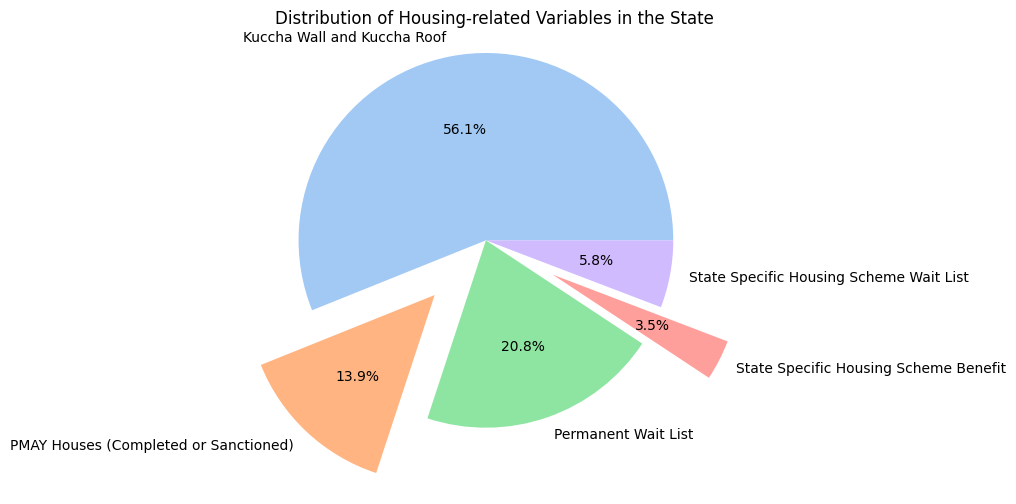

In [ ]:
# Plot the pie chart in 2D
plt.figure(figsize=(10, 6))

colors = sns.color_palette('pastel')[0:5]
explode=[0.0,0.4,0.0,0.4,0.0]
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors,explode=explode)


# Set title
plt.title('Distribution of Housing-related Variables in the State')

plt.axis('equal')



#**Availiblity Of Primary School for each District**#
Using treemap

We have data of each village, but we converted it to data of district and if they have schools or not in a particular range.
This data shows availability of each village of each district.

In [ ]:
# Group data by district
primary_school_data = cleaned_data.groupby(['DISTRICT NAME', 'AVAILABILITY OF PRIMARY SCHOOL']).size().unstack(fill_value=0)

# Reset index to make 'DISTRICT NAME' a regular column
primary_school_data.reset_index(inplace=True)


primary_school_data

AVAILABILITY OF PRIMARY SCHOOL,DISTRICT NAME,No ( Nearest facility1-2 kms),No ( Nearest facility2-5 kms),No ( Nearest facility5-10 kms),No ( Nearest facility< 1 km),No ( Nearest facilityMore than 10 kms),Yes
0,BAKSA,91,164,90,26,29,286
1,BARPETA,110,213,93,30,48,357
2,BONGAIGAON,87,164,70,35,23,158
3,Biswanath,124,307,232,43,71,165
4,CACHAR,103,272,193,32,282,298
5,CHARAIDEO,57,112,35,12,18,90
6,CHIRANG,79,196,92,14,41,89
7,DARRANG,58,182,97,12,45,129
8,DHEMAJI,459,545,273,230,336,400
9,DHUBRI,111,239,170,30,57,298


In [ ]:
# Assuming 'data_total' contains your data
primaryschool_data_melted = pd.melt(primary_school_data, id_vars=['DISTRICT NAME'],
                      var_name='Nearest Facility', value_name='Count')

# Display the melted DataFrame
primaryschool_data_melted


,DISTRICT NAME,Nearest Facility,Count
0,BAKSA,No ( Nearest facility1-2 kms),91
1,BARPETA,No ( Nearest facility1-2 kms),110
2,BONGAIGAON,No ( Nearest facility1-2 kms),87
3,Biswanath,No ( Nearest facility1-2 kms),124
4,CACHAR,No ( Nearest facility1-2 kms),103
...,...,...,...
193,SONITPUR,Yes,165
194,SOUTH SALMARA MANCACHAR,Yes,76
195,TINSUKIA,Yes,233
196,UDALGURI,Yes,202


In [ ]:
import plotly.express as px # pip install plotly

In [ ]:

fig = px.treemap(primaryschool_data_melted, path=["DISTRICT NAME","Nearest Facility"], values="Count")
fig.show()

In [ ]:
cleaned_data["NUMBER OF GRADUATES/POST GRADUATES IN THE VILLAGE"]

0        No ( Nearest facilityMore than 10 kms)
1                                           Yes
2        No ( Nearest facilityMore than 10 kms)
3                No ( Nearest facility5-10 kms)
4                No ( Nearest facility5-10 kms)
                          ...                  
26668    No ( Nearest facilityMore than 10 kms)
26669    No ( Nearest facilityMore than 10 kms)
26670    No ( Nearest facilityMore than 10 kms)
26671            No ( Nearest facility5-10 kms)
26672    No ( Nearest facilityMore than 10 kms)
Name: NUMBER OF GRADUATES/POST GRADUATES IN THE VILLAGE, Length: 26619, dtype: object

In [ ]:

fig = px.parallel_categories(primaryschool_data_melted, dimensions=["DISTRICT NAME","Nearest Facility"], color="Count")


fig.show()


#Gender Ratio in each District#
##Histogram##

<Axes: xlabel='Female_to_Male_Ratio', ylabel='Count'>

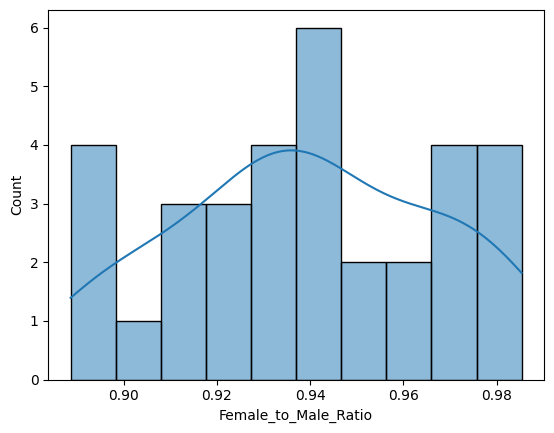

In [ ]:

# Group the data by "DISTRICT NAME" and calculate the sum of "NUMBER OF FEMALE" and "NUMBER OF MALE" for each district
district_sum = cleaned_data.groupby("DISTRICT NAME")[["NUMBER OF FEMALE", "NUMBER OF MALE","NUMBER OF TOTAL POPULATION"]].sum()
district_sum

# Calculate the ratio of NUMBER OF FEMALE divided by NUMBER OF MALE
district_sum["Female_to_Male_Ratio"] = district_sum["NUMBER OF FEMALE"] / district_sum["NUMBER OF MALE"]


sns.histplot(data=district_sum, x ="Female_to_Male_Ratio",bins=10, kde=True)

In [ ]:
district_sum["Female_to_Male_Ratio"]

DISTRICT NAME
BAKSA                      0.940672
BARPETA                    0.918354
BONGAIGAON                 0.938832
Biswanath                  0.911888
CACHAR                     0.931653
CHARAIDEO                  0.931879
CHIRANG                    0.958704
DARRANG                    0.952955
DHEMAJI                    0.937677
DHUBRI                     0.896779
DIBRUGARH                  0.973466
DIMA HASAO                 0.985354
GOALPARA                   0.937147
GOLAGHAT                   0.963779
HAILAKANDI                 0.913919
HOJAI                      0.926738
JORHAT                     0.893475
KAMRUP                     0.888654
KAMRUP METRO               0.942818
KARBI ANGLONG              0.971591
KARIMGANJ                  0.896157
KOKRAJHAR                  0.966535
LAKHIMPUR                  0.951215
MAJULI                     0.915869
MARIGAON                   0.945541
NAGAON                     0.924790
NALBARI                    0.932619
SIVASAGAR     

<Axes: ylabel='Female_to_Male_Ratio'>

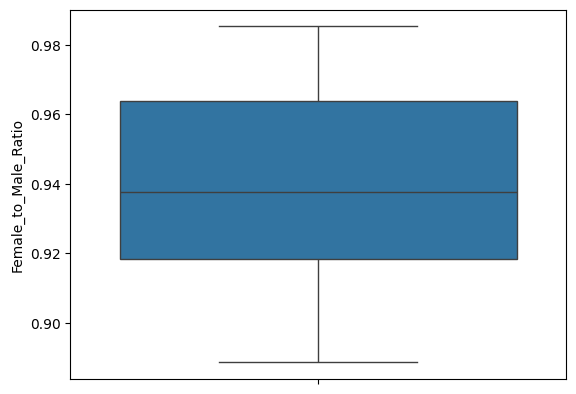

In [ ]:
sns.boxplot(y=district_sum["Female_to_Male_Ratio"])

In [ ]:
# Mean
district_sum["Female_to_Male_Ratio"].mean()

0.9392759805306481

In [ ]:
# Median
district_sum["Female_to_Male_Ratio"].median()

0.9376770360845724

In [ ]:
#Adding Weights
district_sum["wt"]=district_sum["NUMBER OF TOTAL POPULATION"]/district_sum["NUMBER OF TOTAL POPULATION"].sum()
district_sum['wt'].sum()

1.0

In [ ]:
# Calculate the weighted mean of the "Female_to_Male_Ratio" column
weighted_mean = (district_sum["Female_to_Male_Ratio"] * district_sum["wt"]).sum()

#weighted mean
print("Weighted Mean:", weighted_mean)

Weighted Mean: 0.9349030965372732


In [ ]:
# Sort the DataFrame
district_sum_sorted = district_sum.sort_values(by="Female_to_Male_Ratio")

# Calculate the cumulative sum
cumulative_weights = district_sum_sorted["wt"].cumsum()

# Find the position of the weighted median
median_position = np.searchsorted(cumulative_weights, 0.5)

# Check if the median is at half
if cumulative_weights.iloc[median_position] == 0.5:
    weighted_median = district_sum_sorted.iloc[median_position]["Female_to_Male_Ratio"]
else:

    weight_at_median = cumulative_weights.iloc[median_position]
    weight_at_previous = cumulative_weights.iloc[median_position - 1]
    ratio_at_median = district_sum_sorted.iloc[median_position]["Female_to_Male_Ratio"]
    ratio_at_previous = district_sum_sorted.iloc[median_position - 1]["Female_to_Male_Ratio"]

    # Perform linear interpolation
    weighted_median = ratio_at_previous + (0.5 - weight_at_previous) * (ratio_at_median - ratio_at_previous)

weighted_median

0.9326197344535905

In [ ]:
# Calculate the Female-to-Male Ratio
female_to_male_ratio = district_sum["Female_to_Male_Ratio"]

# 1. Deviation
deviation = female_to_male_ratio - female_to_male_ratio.mean()
deviation

DISTRICT NAME
BAKSA                      0.001396
BARPETA                   -0.020921
BONGAIGAON                -0.000444
Biswanath                 -0.027388
CACHAR                    -0.007623
CHARAIDEO                 -0.007397
CHIRANG                    0.019428
DARRANG                    0.013679
DHEMAJI                   -0.001599
DHUBRI                    -0.042497
DIBRUGARH                  0.034190
DIMA HASAO                 0.046079
GOALPARA                  -0.002129
GOLAGHAT                   0.024503
HAILAKANDI                -0.025357
HOJAI                     -0.012538
JORHAT                    -0.045801
KAMRUP                    -0.050622
KAMRUP METRO               0.003542
KARBI ANGLONG              0.032316
KARIMGANJ                 -0.043119
KOKRAJHAR                  0.027259
LAKHIMPUR                  0.011939
MAJULI                    -0.023407
MARIGAON                   0.006265
NAGAON                    -0.014486
NALBARI                   -0.006657
SIVASAGAR     

In [ ]:
female_to_male_ratio

DISTRICT NAME
BAKSA                      0.940672
BARPETA                    0.918354
BONGAIGAON                 0.938832
Biswanath                  0.911888
CACHAR                     0.931653
CHARAIDEO                  0.931879
CHIRANG                    0.958704
DARRANG                    0.952955
DHEMAJI                    0.937677
DHUBRI                     0.896779
DIBRUGARH                  0.973466
DIMA HASAO                 0.985354
GOALPARA                   0.937147
GOLAGHAT                   0.963779
HAILAKANDI                 0.913919
HOJAI                      0.926738
JORHAT                     0.893475
KAMRUP                     0.888654
KAMRUP METRO               0.942818
KARBI ANGLONG              0.971591
KARIMGANJ                  0.896157
KOKRAJHAR                  0.966535
LAKHIMPUR                  0.951215
MAJULI                     0.915869
MARIGAON                   0.945541
NAGAON                     0.924790
NALBARI                    0.932619
SIVASAGAR     

In [ ]:
# 2. Variance
variance = np.var(female_to_male_ratio)
variance

0.0007568765663295608

In [ ]:
# 3. Standard Deviation
std_deviation = np.std(female_to_male_ratio)


In [ ]:
# 4. Mean Absolute Deviation
mean_abs_deviation = np.mean(np.abs(female_to_male_ratio - female_to_male_ratio.mean()))
mean_abs_deviation

0.022601516771843775

In [ ]:
# 5. Median Absolute Deviation from the Median
median_abs_deviation = np.median(np.abs(female_to_male_ratio - np.median(female_to_male_ratio)))
median_abs_deviation


0.021807769194478244

In [ ]:
# 6. Range
data_range = np.max(female_to_male_ratio) - np.min(female_to_male_ratio)
data_range

0.0967005501743452

In [ ]:
# 7. Interquartile Range
q1 = np.percentile(female_to_male_ratio, 25)
print(q1)
q3 = np.percentile(female_to_male_ratio, 75)
print(q3)
interquartile_range = q3 - q1
print(interquartile_range)

0.9183544882865667
0.9637792853722559
0.04542479708568914


In [ ]:
# ax=sns.kdeplot(data=district_sum,x="NUMBER OF TOTAL POPULATION")
# ax=sns.kdeplot(data=district_sum,x="NUMBER OF MALE")
# ax=sns.kdeplot(data=district_sum,x="NUMBER OF FEMALE")
# plt.legend(labels=["full data","male", "female"])
# plt.show ()



In [ ]:
from scipy.stats import chi2

def chi_square_test(observed):
    # Calculate expected frequencies
    row_sums = observed.sum(axis=1)
    col_sums = observed.sum(axis=0)
    total_sum = row_sums.sum()

    expected = np.outer(row_sums, col_sums) / total_sum

    # Calculate chi-square statistic
    chi2_stat = np.sum((observed - expected)**2 / expected)

    # Calculate degrees of freedom
    rows, cols = observed.shape
    degrees_of_freedom = (rows - 1) * (cols - 1)

    # Calculate p-value
    p_value = 1 - chi2.cdf(chi2_stat, degrees_of_freedom)

    return chi2_stat, degrees_of_freedom, p_value

# Null Value hypothesis testing
Using Chi-square and T test to verify.

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency

# Perform group by on 'DISTRICT NAME' and calculate the sum of other columns
grouped_data = cleaned_data.groupby('DISTRICT NAME').sum()

# Create contingency table for chi-square test
contingency_table = pd.crosstab(grouped_data['NUMBER OF MALE'], grouped_data['NUMBER OF FEMALE'])

# Perform chi-square test
chi2, chi_p_value, dof, expected = chi2_contingency(contingency_table)


# Output the results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {chi_p_value}")
print()

# Define significance level
alpha = 0.05
# Chi-square test results
if chi_p_value < alpha:
    print("Chi-square test: There is significant evidence to reject the null hypothesis.")
    print("The variables are not independent.")
else:
    print("Chi-square test: There is no significant evidence to reject the null hypothesis.")
    print("The variables may be independent.")



Chi-square test results:
Chi-square statistic: 1056.0000000000002
P-value: 0.23743844384077747

Chi-square test: There is no significant evidence to reject the null hypothesis.
The variables may be independent.


In [ ]:
from scipy.stats import ttest_ind, chi2_contingency

# Perform group by on 'DISTRICT NAME' and calculate the sum of other columns
grouped_data = cleaned_data.groupby('DISTRICT NAME').sum()

# Create contingency table for chi-square test
contingency_table = pd.crosstab(grouped_data['NUMBER OF PREGNANT WOMEN RECEIVING  SERVICES UNDER ICDS'], grouped_data['NUMBER OF LACTATING MOTHERS RECEIVING SERVICES UNDER ICDS'])

# Perform chi-square test
chi2, chi_p_value, dof, expected = chi2_contingency(contingency_table)


# Output the results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {chi_p_value}")
print()

# Define significance level
alpha = 0.05
# Chi-square test results
if chi_p_value < alpha:
    print("Chi-square test: There is significant evidence to reject the null hypothesis.")
    print("The variables are not independent.")
else:
    print("Chi-square test: There is no significant evidence to reject the null hypothesis.")
    print("The variables may be independent.")



Chi-square test results:
Chi-square statistic: 1056.0
P-value: 0.237438443840779

Chi-square test: There is no significant evidence to reject the null hypothesis.
The variables may be independent.


In [ ]:
#t-Test
import numpy as np
from scipy.stats import t

# Sample data
grouped_data = cleaned_data.groupby('DISTRICT NAME').sum()

# Extracting the two columns
c1 = grouped_data['NUMBER OF PREGNANT WOMEN RECEIVING  SERVICES UNDER ICDS'].values
c2 = grouped_data['NUMBER OF LACTATING MOTHERS RECEIVING SERVICES UNDER ICDS'].values

# Calculate sample means
mean1 = np.mean(c1)
mean2 = np.mean(c2)

# Calculate sample standard deviations
std1 = np.std(c1, ddof=1)  # ddof=1 for sample standard deviation
std2 = np.std(c2, ddof=1)

# Calculate pooled standard deviation (assuming equal variances)
pooled_std = np.sqrt(((len(c1) - 1) * std1 ** 2 + (len(c2) - 1) * std2 ** 2) / (len(c1) + len(c2) - 2))

# Calculate t statistic
t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1 / len(c1) + 1 / len(c2)))

# For Degrees of freedom
dof = len(c1) + len(c2) - 2

# Calculate p-value
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), dof))

# Output the results
print("Two-sample t-test results:")
print(f"T statistic: {t_statistic}")
print(f"P-value: {p_value}")
print()

# Define significance level
alpha = 0.05

# Two-sample t-test results
if p_value < alpha:
    print("Two-sample t-test: There is significant evidence to reject the null hypothesis.")
    print("The means of the two samples are significantly different.")
else:
    print("Two-sample t-test: There is no significant evidence to reject the null hypothesis.")
    print("The means of the two samples may be equal.")


Two-sample t-test results:
T statistic: -1.6148710969756082
P-value: 0.11125841524188984

Two-sample t-test: There is no significant evidence to reject the null hypothesis.
The means of the two samples may be equal.


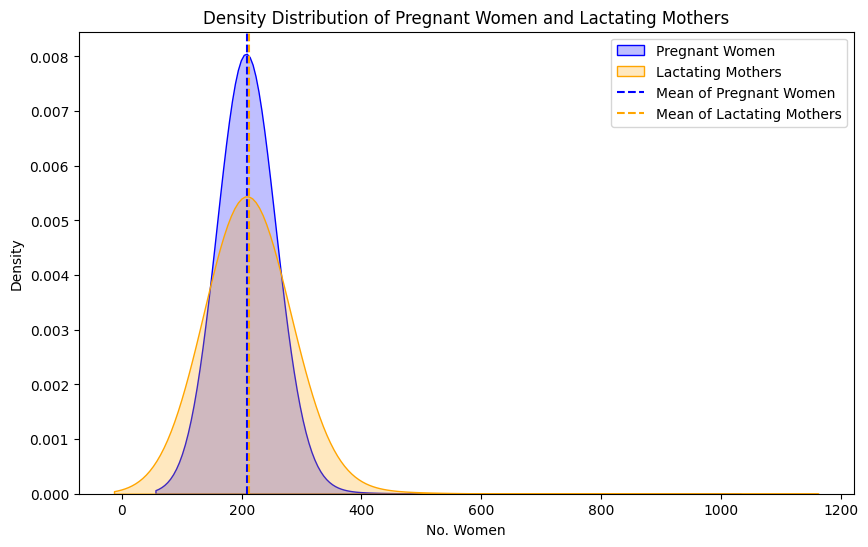

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Shift the x-axis values by 200
shifted_pregnant = cleaned_data['NUMBER OF PREGNANT WOMEN RECEIVING  SERVICES UNDER ICDS'] + 200
shifted_lactating = cleaned_data['NUMBER OF LACTATING MOTHERS RECEIVING SERVICES UNDER ICDS'] + 200

# Calculate means
mean_pregnant = shifted_pregnant.mean()
mean_lactating = shifted_lactating.mean()

# Plot KDE distribution of the two columns with wider bandwidth and more points
plt.figure(figsize=(10, 6))
sns.kdeplot(data=shifted_pregnant, label='Pregnant Women', color='blue', fill=True, bw_adjust=5, bw_method=0.5, linewidth=1)
sns.kdeplot(data=shifted_lactating, label='Lactating Mothers', color='orange', fill=True, bw_adjust=5, bw_method=0.5, linewidth=1)

# Plot vertical lines at the means
plt.axvline(x=mean_pregnant, linestyle='--', color='blue', label='Mean of Pregnant Women')
plt.axvline(x=mean_lactating, linestyle='--', color='orange', label='Mean of Lactating Mothers')

plt.title('Density Distribution of Pregnant Women and Lactating Mothers')
plt.xlabel('No. Women')
plt.ylabel('Density')
plt.legend()
plt.show()


# BY using QQ plot, we can verify if it's following the normal distribution or not!

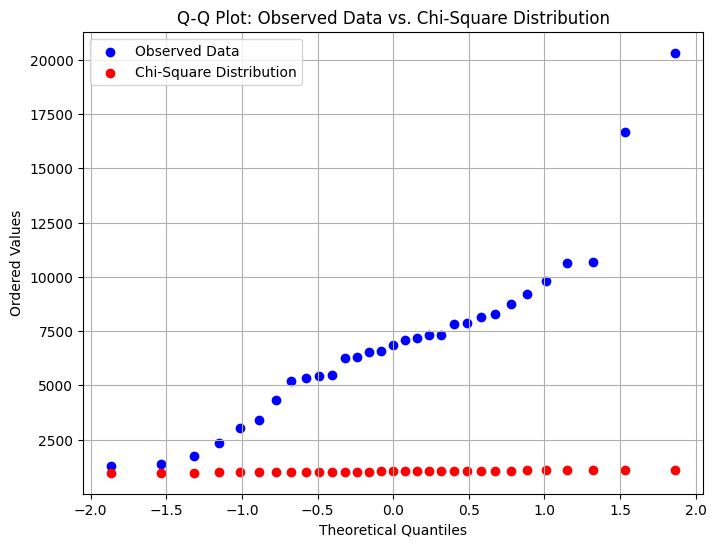

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Degrees of freedom for the chi-square distribution
degrees_of_freedom = dof

# Generate chi-square distributed data with the same size as 'cleaned_data'
chi_squared_data = np.random.chisquare(degrees_of_freedom, size=len(grouped_data))

# Sort the observed and chi-square data
observed_sorted = np.sort(grouped_data['NUMBER OF PREGNANT WOMEN RECEIVING  SERVICES UNDER ICDS'])
chi_squared_sorted = np.sort(chi_squared_data)

# Create a Q-Q plot
plt.figure(figsize=(8, 6))
plt.scatter(stats.norm.ppf(np.linspace(0, 1, len(grouped_data))), observed_sorted, label='Observed Data', color='blue')
plt.scatter(stats.norm.ppf(np.linspace(0, 1, len(grouped_data))), chi_squared_sorted, label='Chi-Square Distribution', color='red')
plt.title('Q-Q Plot: Observed Data vs. Chi-Square Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.legend()
plt.grid(True)
plt.show()


As we can see, the chi square line in QQ Plot is almost straight line so it may follow chi square.

In [ ]:
column_names = cleaned_data.columns

# Print column names
print("Column Names:")
for column in column_names:
    print(column)

Column Names:
STATE NAME
STATE CODE
DISTRICT NAME
DISTRICT CODE
SUB DISTRICT NAME
SUB DISTRICT CODE
BLOCK NAME
BLOCK CODE
GP NAME
GP CODE
VILLAGE NAME
VILLAGE CODE
VILLAGE PIN CODE
PC CODE
NUMBER OF TOTAL POPULATION
NUMBER OF MALE
NUMBER OF FEMALE
NUMBER OF TOTAL HOUSEHOLD
NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN FARM ACTIVITIES
NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN NON-FARM ACTIVITIES
AVAILABILITY OF GOVERNMENT SEED CENTRES
WHETHER THIS VILLAGE IS A PART OF THE WATERSHED DEVELOPMENT PROJECT
AVAILABILITY OF COMMUNITY RAIN WATER HARVESTING SYSTEM/POND/DAM/CHECK DAM ETC.
AVAILABILITY OF WAREHOUSE FOR FOOD GRAIN STORAGE 
AVAILABILITY OF PRIMARY PROCESSING FACILITIES AT THE VILLAGE LEVEL 
DOES THE VILLAGE HAVE ACCESS TO CUSTOM HIRING CENTRE (AGRI-EQUIPMENTS) 
TOTAL CULTIVABLE AREA (IN HECTARES), IF IN ACRES DIVIDE BY 2.47
NET SOWN AREA (IN HECTARES) , IF IN ACRES DIVIDE BY 2.47
AVAILABILITY OF SOIL TESTING CENTRES
AVAILABILITY OF FERTILIZER SHOP
MAIN SOURCE OF IRRIGATION
NUMBER OF FARMERS